# Imports

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load input data

We start by loading the input data, and ensuring the correct folder structure.

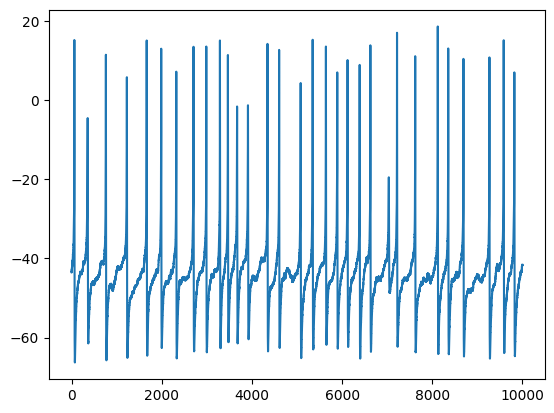

In [32]:
full_traces_folder = "full_traces"
split_traces_folder = "split_traces"

# If the split traces folder doesn't exist, create it
if not os.path.exists(split_traces_folder):
    os.makedirs(split_traces_folder)

# Check we hava a train and a validation subfolder
if not os.path.exists(os.path.join(split_traces_folder, 'train')):
    os.makedirs(os.path.join(split_traces_folder, 'train'))
if not os.path.exists(os.path.join(split_traces_folder, 'val')):
    os.makedirs(os.path.join(split_traces_folder, 'val'))

# Find all txt files
traces = [f for f in os.listdir(full_traces_folder) if f.endswith('.txt')]

def process_trace(filename:str, n_points:int) -> None:
    '''
    Process a single trace file into blocks of defined length. Save the blocks for later use.

    Parameters:
        filename (str): The name of the file to process
        n_points (int): The number of points to split the trace into    
    '''    
    # Read the data
    data = pd.read_csv(os.path.join(full_traces_folder, filename), sep=' ')
    data.columns = ['Time', 'Voltage']

    # Make sure the data is divisible by n_points. This will remove the last few points, but it's not a big deal for this,
    # since we're only using these traces for training. At evaluation time, we can either pad the traces to the correct 
    # length or use overlapping blocks.
    data = data.iloc[:data.shape[0] - data.shape[0] % n_points]

    # Drop the time column
    data = data.drop('Time', axis=1)

    # Split the data into blocks. Note that we use split rather than array_split, since the latter does not guarantee that
    # the blocks will be the same size (which should be anyway because of the line above!).
    blocks = np.split(data, data.shape[0] // n_points)
    
    for i, block in enumerate(blocks):
        # Save the block
        block.to_csv(os.path.join(split_traces_folder, f'{filename[:-4]}_{i}.txt'), sep=' ', index=False)

def plot_trace(filename:str) -> None:
    '''
    Plot a single trace file.

    Parameters:
        filename (str): The name of the file to process        
    '''    

    # Read the data
    data = pd.read_csv(os.path.join(full_traces_folder, filename), sep=' ')
    data.columns = ['Time', 'Voltage']

    # Plot the data
    plt.plot(data['Time'], data['Voltage'])
    plt.show()


plot_trace(traces[5])

In [ ]:
# We're going to keep traces 3 and 6 as our final test set, and use the rest for training/validation

# Split the traces into blocks of 1000 points, with a 80/20 train/validation split
for trace in traces[:3] + traces[4:6]:
    process_trace(trace, 1000)